<a href="https://colab.research.google.com/github/rushikeshjadhav0004-del/Image-Classification-using-CNN-Fashion-MNIST-/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train Images Shape: (60000, 28, 28)
Test Images Shape: (10000, 28, 28)


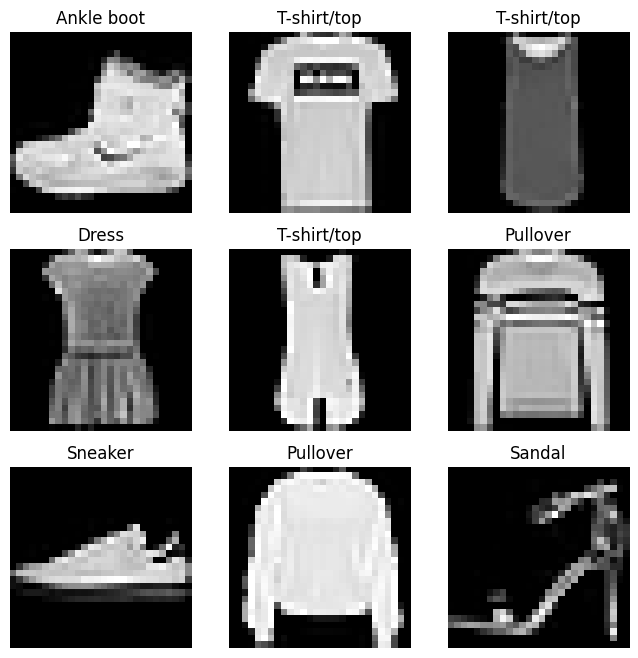

In [ ]:
# ================================================
# 3️⃣ Visualize Sample Images
# ================================================
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)

datagen.fit(train_images)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model = models.Sequential([
    # Conv Layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # Conv Layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten
    layers.Flatten(),

    # Dense Layer + Dropout
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
batch_size = 64
epochs = 50

train_generator = datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training')
val_generator = datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation')

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50
844/844 - 20s - 23ms/step - accuracy: 0.6544 - loss: 0.9169 - val_accuracy: 0.6963 - val_loss: 0.8139
Epoch 2/50
844/844 - 20s - 23ms/step - accuracy: 0.6742 - loss: 0.8628 - val_accuracy: 0.7098 - val_loss: 0.7753
Epoch 3/50
844/844 - 27s - 32ms/step - accuracy: 0.6861 - loss: 0.8275 - val_accuracy: 0.7145 - val_loss: 0.7472
Epoch 4/50
844/844 - 27s - 32ms/step - accuracy: 0.6924 - loss: 0.8078 - val_accuracy: 0.7255 - val_loss: 0.7281
Epoch 5/50
844/844 - 20s - 24ms/step - accuracy: 0.7002 - loss: 0.7820 - val_accuracy: 0.7345 - val_loss: 0.7037
Epoch 6/50
844/844 - 19s - 23ms/step - accuracy: 0.7076 - loss: 0.7702 - val_accuracy: 0.7322 - val_loss: 0.6893
Epoch 7/50
844/844 - 20s - 23ms/step - accuracy: 0.7134 - loss: 0.7520 - val_accuracy: 0.7423 - val_loss: 0.6738
Epoch 8/50
844/844 - 19s - 23ms/step - accuracy: 0.7200 - loss: 0.7352 - val_accuracy: 0.7527 - val_loss: 0.6508
Epoch 9/50
844/844 - 20s - 24ms/step - accuracy: 0.7227 - loss: 0.7299 - val_accuracy: 0.7487 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")


✅ Test Accuracy: 80.50%


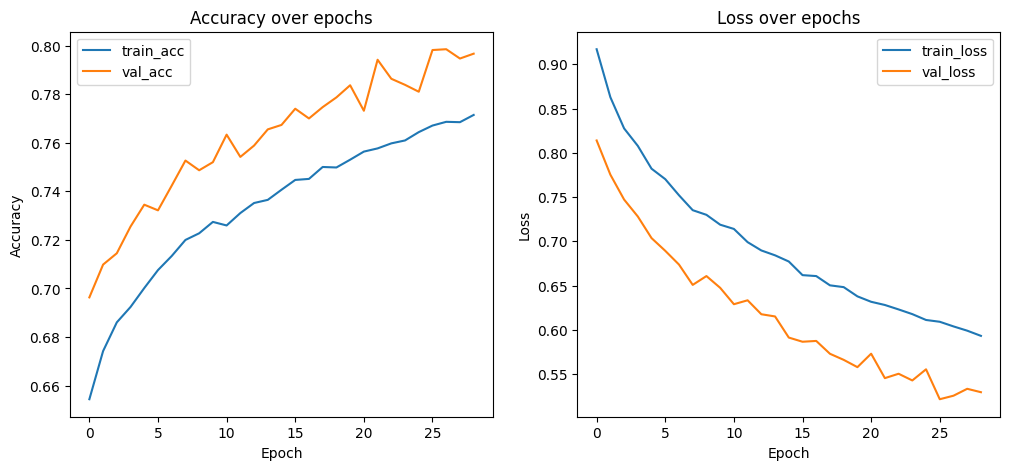

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


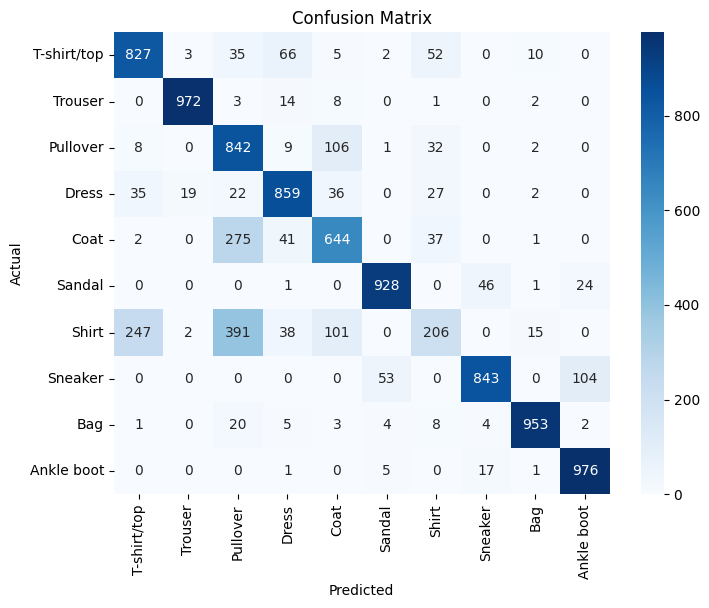


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.83      0.78      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.53      0.84      0.65      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.71      0.64      0.68      1000
      Sandal       0.93      0.93      0.93      1000
       Shirt       0.57      0.21      0.30      1000
     Sneaker       0.93      0.84      0.88      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.88      0.98      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.79     10000
weighted avg       0.81      0.81      0.79     10000



In [ ]:
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(test_labels, y_pred, target_names=class_names))

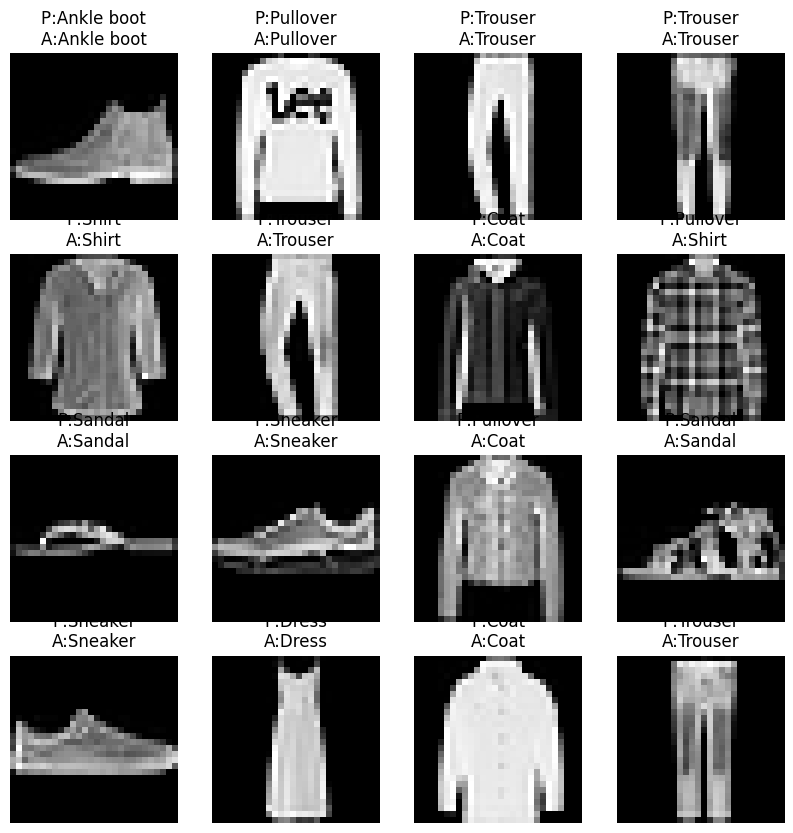

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"P:{class_names[y_pred[i]]}\nA:{class_names[test_labels[i]]}")
    plt.axis('off')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
model.save("fashion_mnist_cnn_professional.h5")
print("Model saved successfully!")

Model saved successfully!
